## Vědecká knihovna SciPy
- staví na NumPy
- několik modulů
    - algoritmy pro clusterové výpočty
    - fyzikální a matematické konstanty
    - Fourierova transformace
    - integrace a obyčejné diferenciální funkce
    - interpolace
    - import a export dat z Matlabu
    - lineární algebra
    - zpracování signálu a obrazu
    - regrese
    - optimalizace a hledání kořenů
    - řídké matice
    - prostorové datové struktury
    - speciální funkce
    - statistika

https://docs.scipy.org/doc/scipy/tutorial/general.html

In [7]:
import scipy

## Modul Special

Např. Besselovy funkce v modulu scipy.special

In [8]:
import scipy.special
n = 0    # order
x = 0.0

# Bessel function of first kind
print("J_%d(%f) = %f" % (n, x, scipy.special.jn(n, x)))

x = 1.0
# Bessel function of second kind
print("Y_%d(%f) = %f" % (n, x, scipy.special.yn(n, x)))

J_0(0.000000) = 1.000000
Y_0(1.000000) = 0.088257


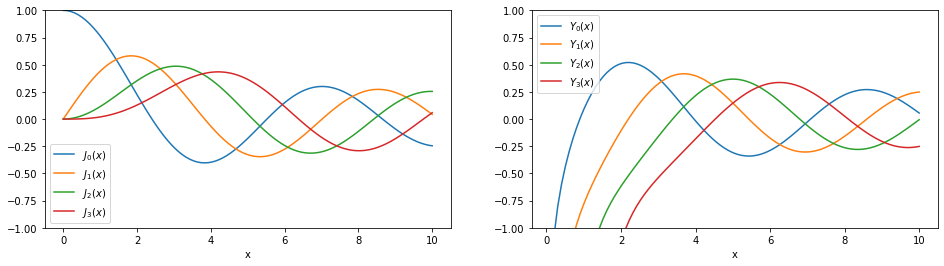

In [9]:
import numpy
import matplotlib.pyplot as plt
x = numpy.linspace(0, 10, 100)

fig, ax = plt.subplots(1, 2, figsize=(16,4))
for i, (func, label) in enumerate(zip((scipy.special.jn, scipy.special.yn), (r"$J_%d(x)$", r"$Y_%d(x)$"))):
    for n in range(4):
        ax[i].plot(x, func(n, x), label=label % n)
    ax[i].legend(loc="best")
    ax[i].set_xlabel("x")
    ax[i].set_ylim(-1, 1)

## Derivace
např. $f(x)=2x/(1-x^2)$ v bodě $x=3$

In [10]:
import scipy.misc
def f(x):
    return (2*x) / (1-(x**2))
result = scipy.misc.derivative(f, 3, dx=1e-6)
print(result)

0.3125000000436806


## Integrace
- určitý integrál
- řešení obyčejných diferenciálních rovnic

In [11]:
import scipy.integrate as integrate
result = integrate.quad(lambda x: 4, 0, 2)  # konstantní funkce y = 4, od 0 do 2
# (Fortran library QUADPACK)
print(result)
result = integrate.quad(lambda x: x, 0, 2)  # lineární funkce y = x
print(result)                               # výsledek, chyba

(8.0, 8.881784197001252e-14)
(2.0, 2.220446049250313e-14)


Dvojný integrál

In [12]:
import scipy.integrate, math
def funkce(x, y):
    return (x**2) * y * (math.exp(x*y))
result = scipy.integrate.dblquad(funkce, 0, 2, 0, 1)      # x od 0 do 2, y od 0 do 1
result

(2.0, 3.526464691694632e-14)

## Interpolace

In [13]:
from scipy.interpolate import interp1d

In [14]:
x = numpy.linspace(0, 10, num=11, endpoint=True)
y = numpy.cos(-x**2/9.0)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

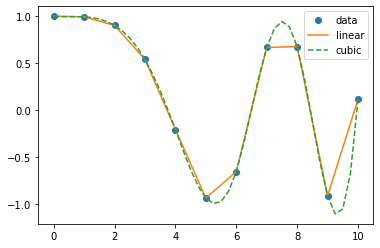

In [15]:
xnew = numpy.linspace(0, 10, num=41, endpoint=True)
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

## Fourierova transformace

In [16]:
from scipy.fft import fft, ifft
x = numpy.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)
print(y)
yinv = ifft(y)
yinv

[ 4.5       -0.j          2.08155948-1.65109876j -1.83155948+1.60822041j
 -1.83155948-1.60822041j  2.08155948+1.65109876j]


array([ 1. +0.j,  2. +0.j,  1. +0.j, -1. +0.j,  1.5+0.j])

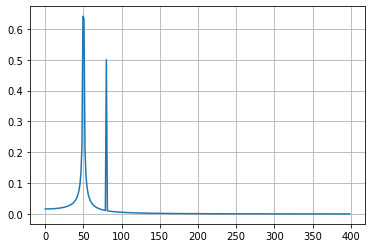

In [17]:
from scipy.fft import fft, fftfreq
N = 600             # počet vzorků
T = 1.0 / 800.0     # perioda
x = numpy.linspace(0.0, N*T, N, endpoint=False)
y = numpy.sin(50.0 * 2.0*numpy.pi*x) + 0.5*numpy.sin(80.0 * 2.0*numpy.pi*x)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]

import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * numpy.abs(yf[0:N//2]))
plt.grid()
plt.show()

### Fourierova transformace - příklad

Příprava signálu (v poli x)

In [1]:
import numpy as np

sr = 2000                   # vzorkovací frekvence (sampling rate)
ts = 1.0 / sr               # interval vzorkování (sampling interval)
t = np.arange(0, 1, ts)     # [0.0 až 0.995]

u1 = 3 * np.sin(2*np.pi*1*t)
u2 = 0
u3 = np.sin(2*np.pi*4*t)
u4 = 0
u5 = 0
u6 = 0
u7 = 0.5 * np.sin(2*np.pi*7*t)
x = u1 + u2 + u3 + u4 + u5 + u6 + u7

Jiný signál

In [30]:
import numpy as np

t = np.linspace(0,1,1000)
sr = 1000

pi2 = np.pi/2
u1 = 0.81   * np.cos(2*np.pi*1*t - pi2)            # 8./pi/pi
u2 = 0
u3 = 0.09   * np.cos(2*np.pi*3*t + pi2)            # 8./3/3/pi/pi
u4 = 0
u5 = 0.0324 * np.cos(2*np.pi*5*t - pi2)            # 8./5/5/pi/pi
u6 = 0
u7 = 0.0165 * np.cos(2*np.pi*7*t + pi2)            # 8./7/7/pi/pi
x = u1 + u2 + u3 + u4 + u5 + u6 + u7

Vykreslení signálu

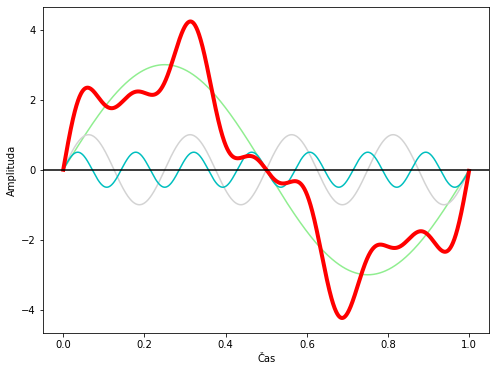

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 6))
if type(u1) == np.ndarray: plt.plot(t, u1, color = 'lightgreen')
if type(u2) == np.ndarray: plt.plot(t, u2, 'b')
if type(u3) == np.ndarray: plt.plot(t, u3, color = 'lightgray')
if type(u4) == np.ndarray: plt.plot(t, u4, 'm')
if type(u5) == np.ndarray: plt.plot(t, u5, 'y')
if type(u6) == np.ndarray: plt.plot(t, u6, 'p')
if type(u7) == np.ndarray: plt.plot(t, u7, 'c')
plt.plot(t, x, 'r', linewidth = 4)

plt.axhline(y = 0, color='k')               # vykreslení osy x (osa y axvline)
plt.xlabel('Čas')
plt.ylabel('Amplituda')

plt.show()

Možno řešit pomocí knihovny NumPy nebo SciPy

In [21]:
from numpy.fft import fft, ifft         # pomalejší

In [3]:
from scipy.fftpack import fft, ifft     # rychlejší

FFT a inverzní FFT

C:\Users\P\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


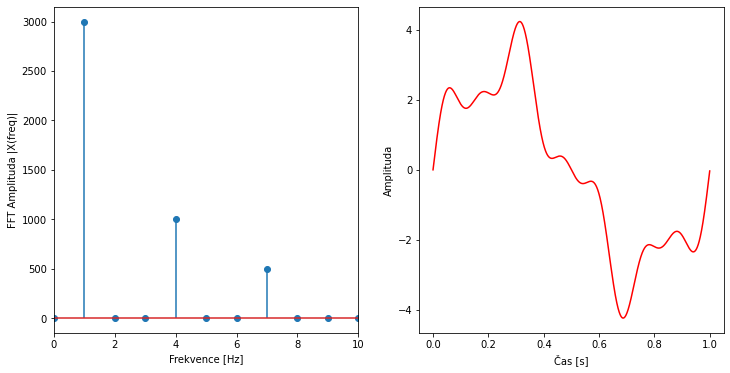

In [21]:
X = fft(x)                              # FFT
N = len(X)                              # 2000
n = np.arange(N)                        # [0 až 1999]
T = N/sr                                # 1.0
freq = n/T                              # [0.0 až 1999.0]

plt.figure(figsize = (12, 6))

plt.subplot(121)
plt.stem(freq, np.abs(X))
plt.xlabel('Frekvence [Hz]')
plt.ylabel('FFT Amplituda |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')               # inverzní FFT
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
#plt.tight_layout()                      # jen kvůli rozložení grafů do obrázku
plt.show()

## Zpracování signálu

In [24]:
from scipy import signal, misc
image = misc.face(gray=True).astype(numpy.float32)
derfilt = numpy.array([1.0, -2, 1.0], dtype=numpy.float32)

In [25]:
ck = signal.cspline2d(image, 8.0)
deriv = (signal.sepfir2d(ck, derfilt, [1]) + signal.sepfir2d(ck, [1], derfilt))

In [26]:
laplacian = numpy.array([[0,1,0], [1,-4,1], [0,1,0]], dtype=numpy.float32)
deriv2 = signal.convolve2d(ck,laplacian,mode='same',boundary='symm')

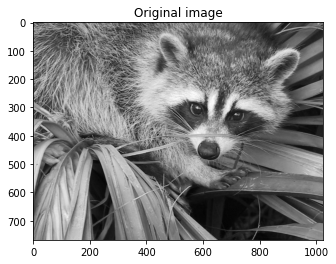

In [27]:
plt.figure()
plt.imshow(image)
plt.gray()
plt.title('Original image')
plt.show()

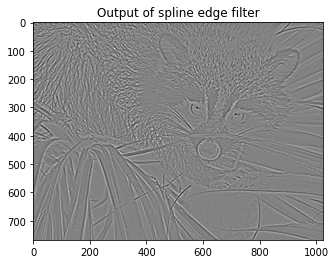

In [28]:
plt.figure()
plt.imshow(deriv2)
plt.gray()
plt.title('Output of spline edge filter')
plt.show()

## Lineární algebra


In [29]:
import numpy
from scipy import linalg
A = numpy.array([[1,3,5],[2,5,1],[2,3,8]])
print(A)
linalg.inv(A)

[[1 3 5]
 [2 5 1]
 [2 3 8]]


array([[-1.48,  0.36,  0.88],
       [ 0.56,  0.08, -0.36],
       [ 0.16, -0.12,  0.04]])

In [30]:
A @ linalg.inv(A)

array([[ 1.00000000e+00, -1.11022302e-16,  4.85722573e-17],
       [ 3.05311332e-16,  1.00000000e+00,  7.63278329e-17],
       [ 2.22044605e-16, -1.11022302e-16,  1.00000000e+00]])

Řešení lineárních soustav

In [31]:
from scipy import linalg
A = numpy.array([[1, 2], [3, 4]])
A

array([[1, 2],
       [3, 4]])

In [32]:
b = numpy.array([[5], [6]])
b

array([[5],
       [6]])

In [33]:
linalg.inv(A).dot(b)                    # pomalé

array([[-4. ],
       [ 4.5]])

In [34]:
A.dot(linalg.inv(A).dot(b)) - b         # kontrola

array([[0.],
       [0.]])

In [35]:
numpy.linalg.solve(A, b)                # rychlé

array([[-4. ],
       [ 4.5]])

In [36]:
A.dot(numpy.linalg.solve(A, b)) - b     # kontrola

array([[0.],
       [0.]])

Výpočet deteminantu

In [37]:
from scipy import linalg
A = numpy.array([[1,2],[3,4]])
print(A)
linalg.det(A)

[[1 2]
 [3 4]]


-2.0

## Statistika

In [38]:
from scipy import stats
from scipy.stats import norm

In [39]:
print(norm.pdf(0))  # Probability Density Function
norm.cdf(0)         # Cumulative Distribution Function

0.3989422804014327


0.5

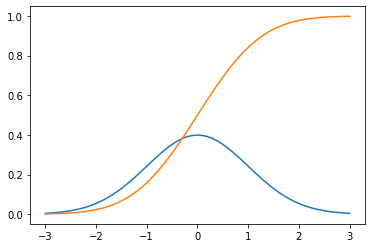

In [40]:
#import matplotlib.pyplot as plt
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = numpy.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma), x, norm.cdf(x, mu, sigma))
plt.show()